## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/microsoft/Data-Science-For-Beginners/main/data/diabetes.tsv"
df = pd.read_csv(url,sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [27]:
# most straight forward way
mean = df[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']].mean()
variance = df[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']].var()
print(f"Mean: \n{mean.apply(lambda x: format(x, '.2f'))}\n") # Apply the formatting to each element in the Series
print(f"Variance: \n{variance.apply(lambda x: format(x, '.2f'))}") # Apply the formatting to each element in the Series

Mean: 
AGE     48.52
SEX      1.47
BMI     26.38
BP      94.65
S1     189.14
S2     115.44
S3      49.79
S4       4.07
S5       4.64
S6      91.26
Y      152.13
dtype: object

Variance: 
AGE     171.85
SEX       0.25
BMI      19.52
BP      191.30
S1     1197.72
S2      924.96
S3      167.29
S4        1.67
S5        0.27
S6      132.17
Y      5943.33
dtype: object


In [28]:
# comprehensive way
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [29]:
# Another way
pd.DataFrame([df.mean(),df.var()],index=['Mean','Variance']).head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
Mean,48.51810,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
Variance,171.84661,0.249561,19.519798,191.304401,1197.717241,924.955494,167.293585,1.665261,0.272892,132.165712,5943.331348


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

<Figure size 1000x600 with 0 Axes>

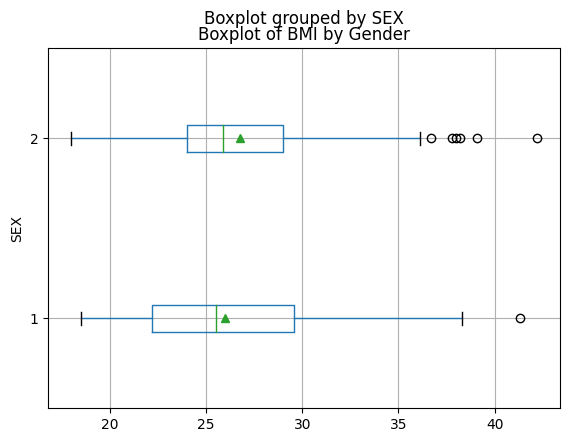

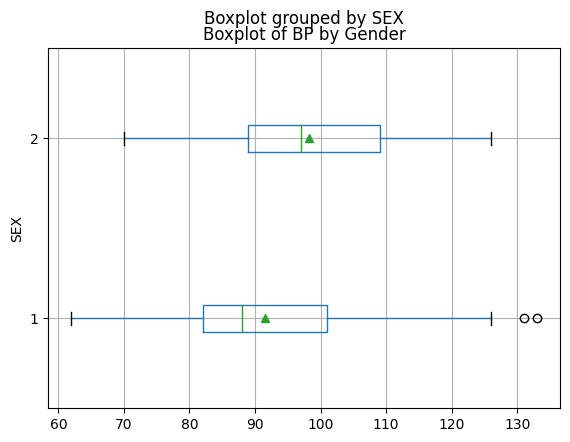

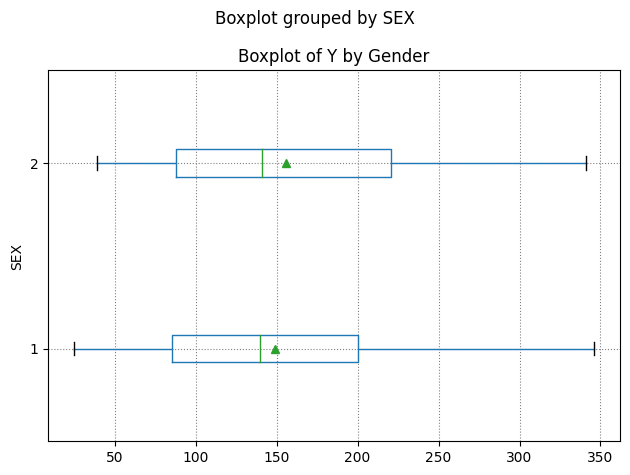

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for col in ['BMI', 'BP', 'Y']:
  df.boxplot(col, by='SEX', vert=False, showmeans=True)
  plt.title(f'Boxplot of {col} by Gender')
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

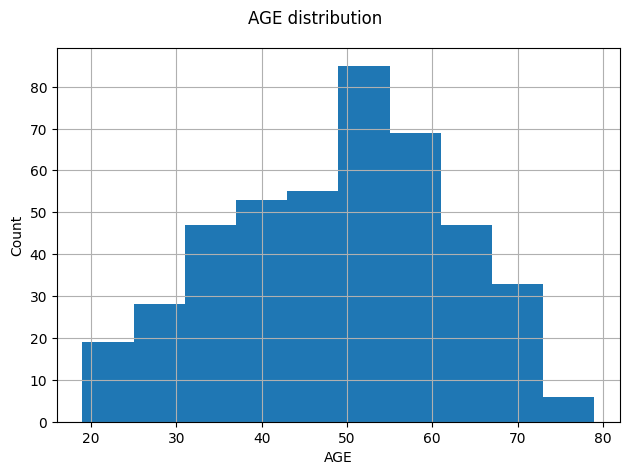

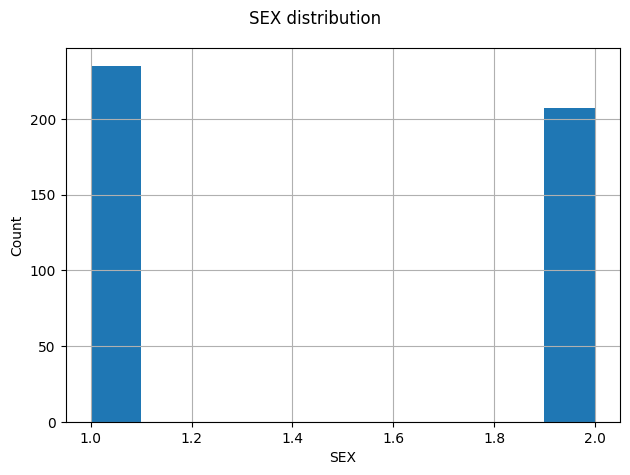

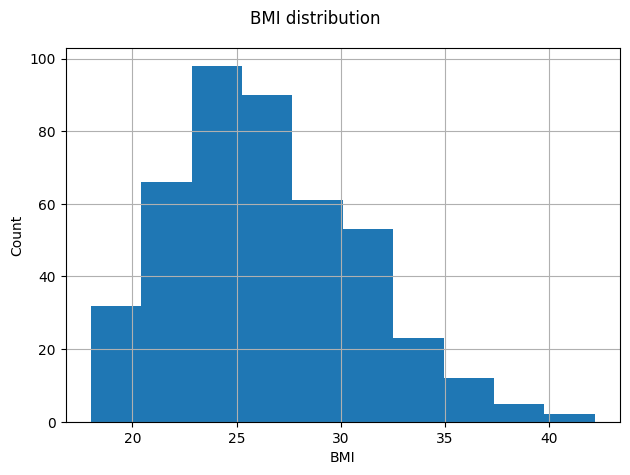

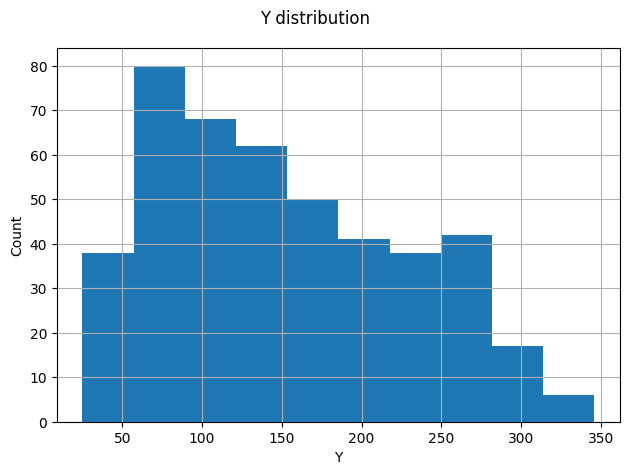

In [34]:
for col in ['AGE', 'SEX', 'BMI', 'Y']:
  df[col].hist()
  plt.suptitle(f'{col} distribution')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [23]:
# Create a DataFrame with the relevant columns
df_subset = df[['Y', 'AGE', 'SEX', 'BMI', 'BP']]

# Calculate the correlation coefficient matrix
correlation_matrix = np.corrcoef(df_subset, rowvar=False)

# Print the correlation matrix
print(correlation_matrix)

[[1.         0.18788875 0.043062   0.58645013 0.44148176]
 [0.18788875 1.         0.1737371  0.18508467 0.33542759]
 [0.043062   0.1737371  1.         0.0881614  0.24101049]
 [0.58645013 0.18508467 0.0881614  1.         0.3954109 ]
 [0.44148176 0.33542759 0.24101049 0.3954109  1.        ]]


In [35]:
# Yet another more simple way
df.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


From the Correlation matrix of differennt variables, like Age, Gender, BMI, BP, and disease progression (Y), we can conclude that, **BMI** is the most related factor, and then is the **BP**. **Ages** has less significant influence on Y, and **gender** is the least relavant factor.

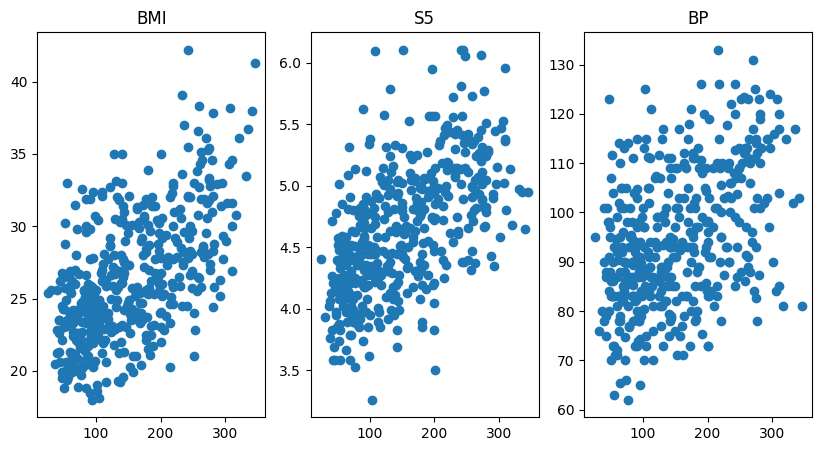

In [36]:
# Visualize the correlations
fig, ax = plt.subplots(1,3,figsize=(10,5))
for i,n in enumerate(['BMI','S5','BP']):
    ax[i].scatter(df['Y'],df[n])
    ax[i].set_title(n)
plt.show()

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [25]:
import scipy.stats
from scipy.stats import ttest_ind

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85,0.9,0.95]:
  mean_male, h_male = mean_confidence_interval(df.loc[df['SEX']==1,['Y']])
  mean_female, h_female = mean_confidence_interval(df.loc[df['SEX']==2,['Y']])
  print(f'Conf={p:.2f}, male Y: {mean_male-h_male[0]:.2f}..{mean_male+h_male[0]:.2f}, female Y: {mean_female-h_female[0]:.2f}..{mean_female+h_female[0]:.2f}')

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

Conf=0.85, male Y: 139.27..158.78, female Y: 144.92..166.42
Conf=0.90, male Y: 139.27..158.78, female Y: 144.92..166.42
Conf=0.95, male Y: 139.27..158.78, female Y: 144.92..166.42
T-value = -0.90
P-value: 0.3674449793083975


We can see that the intervals are *overlapped*, which indicates that the hypothesis may be **wrong**.

A statistically more correct way to prove the hypothesis is to use a **Student t-test**:

The two values returned by the `ttest_ind` function are:

* **p-value** can be considered as the probability of two distributions having the same mean. In our case, it is 0.37, meaning that the degree of diabetes progression may not so different between men and women.
* **t-value** is the intermediate value of normalized mean difference that is used in the t-test, and it is compared against a threshold value for a given confidence value.